In [4]:
import wordcloud
import jieba
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [5]:
mk = imageio.imread("picture/chinamap.png")

In [6]:
# 构建并配置两个词云对象w1和w2，分别存放积极词和消极词
w1 = wordcloud.WordCloud(width=1000,height=700,background_color='white',font_path='msyh.ttc',mask=mk,scale=5)
w2 = wordcloud.WordCloud(width=1000,height=700,background_color='white',font_path='msyh.ttc',mask=mk,scale=5)

In [7]:
# 对来自外部文件的文本进行中文分词，得到积极词汇和消极词汇的两个列表
f = open('words/三国演义.txt',encoding='utf-8')
txt = f.read()
txtlist = jieba.lcut(txt)
positivelist = []
negativelist = []

# 下面对文本中的每个词进行情感分析，情感>0.96判为积极词，情感<0.06判为消极词
print('开始进行情感分析，请稍等，三国演义全文那么长的文本需要三分钟左右')
# 导入自然语言处理第三方库snownlp
import snownlp
for each in txtlist:
    each_word = snownlp.SnowNLP(each)
    feeling = each_word.sentiments
    if feeling > 0.96:
        positivelist.append(each)
    elif feeling < 0.06:
        negativelist.append(each)
    else:
        pass
# 将积极和消极的两个列表各自合并成积极字符串和消极字符串，字符串中的词用空格分隔
positive_string = " ".join(positivelist)
negative_string = " ".join(negativelist)




Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\David\AppData\Local\Temp\jieba.cache
Loading model cost 0.697 seconds.
Prefix dict has been built successfully.


开始进行情感分析，请稍等，三国演义全文那么长的文本需要三分钟左右


In [8]:
# 将string变量传入w的generate()方法，给词云输入文字
w1.generate(positive_string)
w2.generate(negative_string)

# 将积极、消极的两个词云图片导出到当前文件夹
w1.to_file('WordClouds/output12-positive.png')
w2.to_file('WordClouds/output12-negative.png')
print('词云生成完成')

词云生成完成


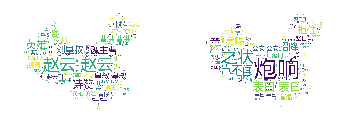

In [9]:
img1=Image.open("WordClouds/output12-positive.png")
img2=Image.open("WordClouds/output12-negative.png")
m1=np.asarray(img1)
m2=np.asarray(img2)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(m1)
axes[1].imshow(m2)

for ax in axes:
    ax.set_axis_off()
plt.show()